<a href="https://colab.research.google.com/github/pauarmentaa/Regresion-Lineal/blob/main/Actividad_6_1_MEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Datos_limpios_MEX.csv")
df.head()

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,sin informacion,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,...,4.950000,5.000000,4.950000,5.000000,4.860000,3.0,3.0,0.0,0.0,0.19
1,1.0,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,...,4.880000,4.930000,5.000000,4.950000,4.840000,2.0,2.0,0.0,0.0,0.54
2,2.0,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,...,4.710000,4.920000,4.920000,4.900000,4.710000,3.0,3.0,0.0,0.0,0.31
3,3.0,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,1.0,0.0,0.0,1.14
4,4.0,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,sin informacion,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,...,4.700000,4.870000,4.780000,4.980000,4.480000,12.0,3.0,2.0,0.0,0.46


In [3]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

72

In [4]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [5]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24225 entries, 0 to 24224
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    24225 non-null  float64
 1   listing_url                                   24225 non-null  object 
 2   last_scraped                                  24225 non-null  object 
 3   source                                        24225 non-null  object 
 4   name                                          24225 non-null  object 
 5   description                                   24225 non-null  object 
 6   neighborhood_overview                         24225 non-null  object 
 7   picture_url                                   24225 non-null  object 
 8   host_url                                      24225 non-null  object 
 9   host_name                                     24225 non-null 

## Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”

# **Tipo de habitación 1: Private room.**

## **1.host_acceptance_rate vs host_response_rate**

In [7]:
# Filtrar los datos para obtener solo los tipos de habitación "Entire home/apt" y "Hotel room"
private_room = df[df['room_type'] == 'Private room']

In [ ]:
#Cambiar datos
private_room['host_response_rate'] = private_room['host_response_rate'].astype(str)  
private_room['host_response_rate'] = private_room['host_response_rate'].str.replace('%', '')  
private_room['host_response_rate'] = pd.to_numeric(private_room['host_response_rate'], errors='coerce')  

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

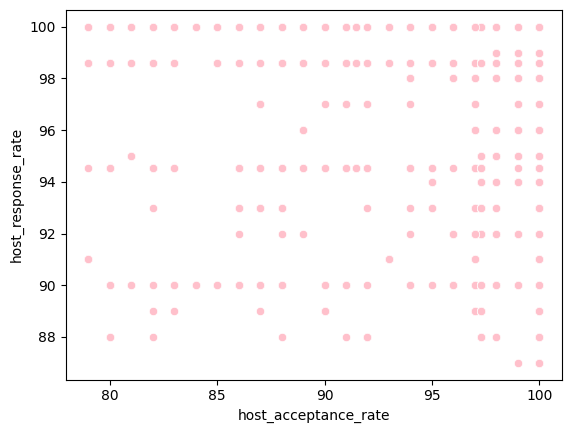

In [9]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=private_room)


In [10]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_acceptance_rate']]
Var_Dep= private_room['host_response_rate']

In [11]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [12]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [13]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [14]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.08216643]),
 'rank_': 1,
 'singular_': array([409.85669822]),
 'intercept_': 90.14555660858437}

**Modelo matemático: y= 0.08216643x + 90.14555660858437**

In [15]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.017105431117592107

In [16]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_acceptance_rate']])
y_pred

array([98.36219934, 98.14034998, 97.66018962, ..., 98.36219934,
       98.36219934, 98.03353363])

In [17]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones', y_pred)
private_room.head()

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,98.362199,7.0,https://www.airbnb.com/rooms/61792,30/03/23,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,https://a0.muscache.com/pictures/4c674e38-42f8...,https://www.airbnb.com/users/show/299558,...,4.900000,4.920000,4.950000,4.940000,4.870000,2.0,0.0,2.0,0.0,0.94
16,98.140350,16.0,https://www.airbnb.com/rooms/760912,30/03/23,city scrape,"Stylish bachelor pad in La Roma, DF",<b>The space</b><br />If you are coming to Mex...,sin informacion,https://a0.muscache.com/pictures/10580755/b2dc...,https://www.airbnb.com/users/show/3817743,...,4.800000,5.000000,4.600000,4.800000,4.600000,1.0,0.0,1.0,0.0,0.04
17,97.660190,17.0,https://www.airbnb.com/rooms/2088218,30/03/23,city scrape,Private rooms near old Coyoacan center,Hello! I have 2 private rooms for rent in a ni...,"Es una zona residencial de Coyoacán, ubicada e...",https://a0.muscache.com/pictures/32395878/54f6...,https://www.airbnb.com/users/show/10659485,...,4.600000,5.000000,4.800000,4.900000,4.400000,1.0,0.0,1.0,0.0,0.04
18,98.140350,18.0,https://www.airbnb.com/rooms/2093036,29/03/23,city scrape,Departamento 2 dormitorios x Antara,Departamento de 2 dormitorios y 1 banos comple...,El apartamento se encuentra en una zona reside...,https://a0.muscache.com/pictures/28553895/71d5...,https://www.airbnb.com/users/show/3083561,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,0.0,1.0,0.0,1.14
21,97.660190,21.0,https://www.airbnb.com/rooms/131610,29/03/23,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,sin informacion,https://a0.muscache.com/pictures/837085/b9ed71...,https://www.airbnb.com/users/show/647454,...,4.746342,4.827133,4.815533,4.832627,4.708674,3.0,1.0,2.0,0.0,1.14


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

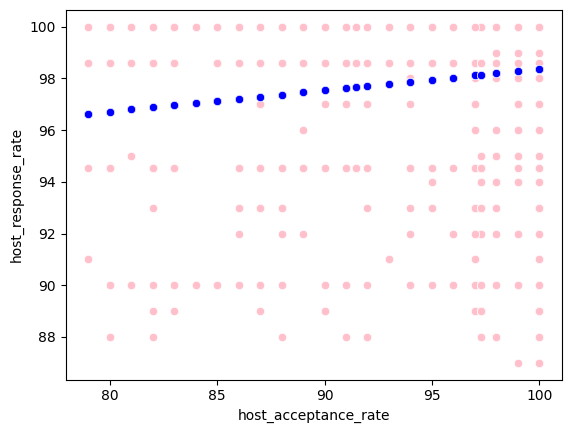

In [18]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="pink", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="blue", data=private_room)

In [19]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.017105431117592107
Coeficiente de correlación:  0.13078773305471775


## **2.host_acceptance_rate vs price**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

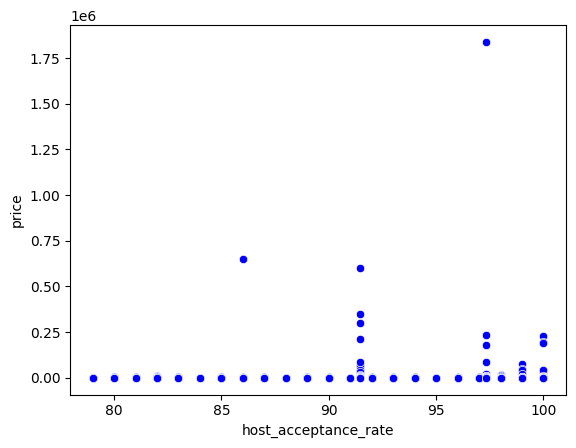

In [20]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price',color="blue",data=private_room)

In [21]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_acceptance_rate']]
Var_Dep= private_room['price']

In [22]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [23]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [24]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [25]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-76.28074345]),
 'rank_': 1,
 'singular_': array([409.85669822]),
 'intercept_': 8883.126053838696}

**Modelo matemático: y= -76.28074345x + 8883.126053838696**

In [26]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0002093401541626294

In [27]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_acceptance_rate']])
y_pred

array([1255.0517087 , 1461.00971602, 1906.77558998, ..., 1255.0517087 ,
       1255.0517087 , 1560.17468251])

In [28]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones2', y_pred)
private_room.head()

,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,1255.051709,98.362199,7.0,https://www.airbnb.com/rooms/61792,30/03/23,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,https://a0.muscache.com/pictures/4c674e38-42f8...,...,4.900000,4.920000,4.950000,4.940000,4.870000,2.0,0.0,2.0,0.0,0.94
16,1461.009716,98.140350,16.0,https://www.airbnb.com/rooms/760912,30/03/23,city scrape,"Stylish bachelor pad in La Roma, DF",<b>The space</b><br />If you are coming to Mex...,sin informacion,https://a0.muscache.com/pictures/10580755/b2dc...,...,4.800000,5.000000,4.600000,4.800000,4.600000,1.0,0.0,1.0,0.0,0.04
17,1906.775590,97.660190,17.0,https://www.airbnb.com/rooms/2088218,30/03/23,city scrape,Private rooms near old Coyoacan center,Hello! I have 2 private rooms for rent in a ni...,"Es una zona residencial de Coyoacán, ubicada e...",https://a0.muscache.com/pictures/32395878/54f6...,...,4.600000,5.000000,4.800000,4.900000,4.400000,1.0,0.0,1.0,0.0,0.04
18,1461.009716,98.140350,18.0,https://www.airbnb.com/rooms/2093036,29/03/23,city scrape,Departamento 2 dormitorios x Antara,Departamento de 2 dormitorios y 1 banos comple...,El apartamento se encuentra en una zona reside...,https://a0.muscache.com/pictures/28553895/71d5...,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,0.0,1.0,0.0,1.14
21,1906.775590,97.660190,21.0,https://www.airbnb.com/rooms/131610,29/03/23,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,sin informacion,https://a0.muscache.com/pictures/837085/b9ed71...,...,4.746342,4.827133,4.815533,4.832627,4.708674,3.0,1.0,2.0,0.0,1.14


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

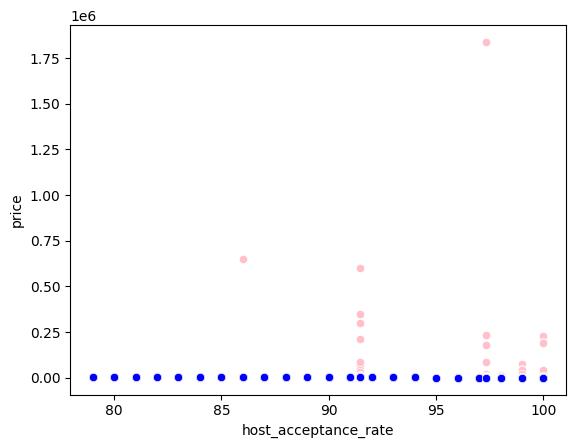

In [29]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='price', color="pink", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones2', color="blue", data=private_room)

In [30]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0002093401541626294
Coeficiente de correlación:  0.014468591989638433


## **3. host_acceptance_rate vs number_of_reviews**

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

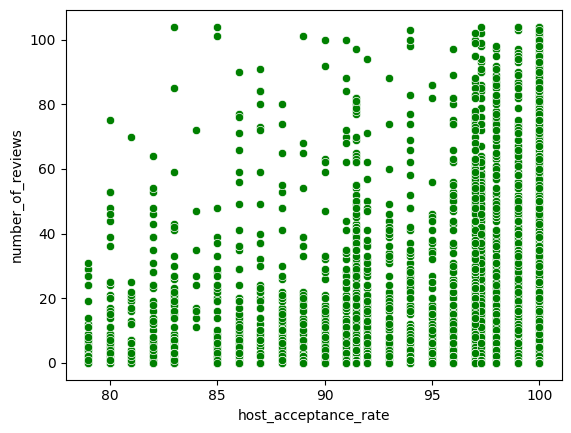

In [31]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews',color="green",data=private_room)

In [32]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_acceptance_rate']]
Var_Dep= private_room['number_of_reviews']

In [33]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [34]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [35]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [36]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.47515101]),
 'rank_': 1,
 'singular_': array([409.85669822]),
 'intercept_': -30.898118453396183}

**Modelo matemático: y= 0.47515101x + -30.898118453396183**

In [37]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.010319632601101247

In [38]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_acceptance_rate']])
y_pred

array([16.61698209, 15.33407437, 12.55740895, ..., 16.61698209,
       16.61698209, 14.71637807])

In [39]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones3', y_pred)
private_room.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,16.616982,1255.051709,98.362199,7.0,https://www.airbnb.com/rooms/61792,30/03/23,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,...,4.900000,4.920000,4.950000,4.940000,4.870000,2.0,0.0,2.0,0.0,0.94
16,15.334074,1461.009716,98.140350,16.0,https://www.airbnb.com/rooms/760912,30/03/23,city scrape,"Stylish bachelor pad in La Roma, DF",<b>The space</b><br />If you are coming to Mex...,sin informacion,...,4.800000,5.000000,4.600000,4.800000,4.600000,1.0,0.0,1.0,0.0,0.04
17,12.557409,1906.775590,97.660190,17.0,https://www.airbnb.com/rooms/2088218,30/03/23,city scrape,Private rooms near old Coyoacan center,Hello! I have 2 private rooms for rent in a ni...,"Es una zona residencial de Coyoacán, ubicada e...",...,4.600000,5.000000,4.800000,4.900000,4.400000,1.0,0.0,1.0,0.0,0.04
18,15.334074,1461.009716,98.140350,18.0,https://www.airbnb.com/rooms/2093036,29/03/23,city scrape,Departamento 2 dormitorios x Antara,Departamento de 2 dormitorios y 1 banos comple...,El apartamento se encuentra en una zona reside...,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,0.0,1.0,0.0,1.14
21,12.557409,1906.775590,97.660190,21.0,https://www.airbnb.com/rooms/131610,29/03/23,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,sin informacion,...,4.746342,4.827133,4.815533,4.832627,4.708674,3.0,1.0,2.0,0.0,1.14


<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

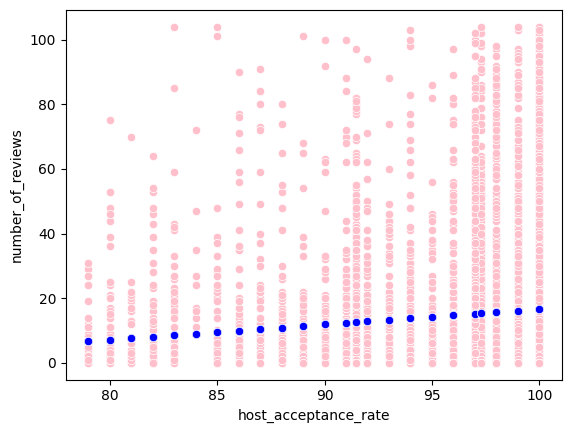

In [40]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="pink", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="blue", data=private_room)

In [41]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.010319632601101247
Coeficiente de correlación:  0.10158559248781909


## **4. review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

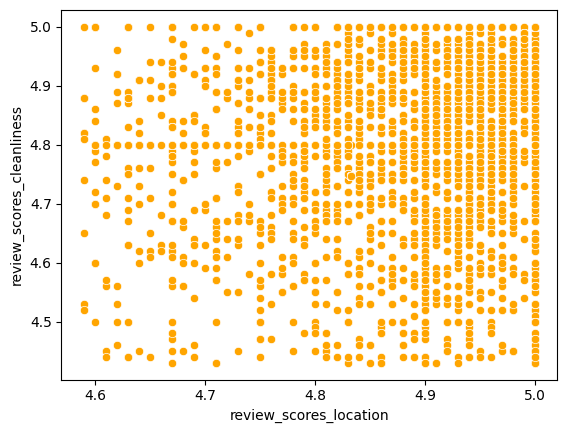

In [42]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness',color="orange", data=private_room)

In [43]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['review_scores_location']]
Var_Dep= private_room['review_scores_cleanliness']

In [44]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [45]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [46]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [47]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.56847058]),
 'rank_': 1,
 'singular_': array([8.49557769]),
 'intercept_': 2.039619155472766}

**Modelo matemático: y= 0.56847058x + 2.039619155472766**

In [48]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.15013217351593855

In [49]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['review_scores_location']])
y_pred

array([4.84786383, 4.76827795, 4.82512501, ..., 4.78682516, 4.78682516,
       4.78682516])

In [50]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones4', y_pred)
private_room.head()

,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,4.847864,16.616982,1255.051709,98.362199,7.0,https://www.airbnb.com/rooms/61792,30/03/23,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",...,4.900000,4.920000,4.950000,4.940000,4.870000,2.0,0.0,2.0,0.0,0.94
16,4.768278,15.334074,1461.009716,98.140350,16.0,https://www.airbnb.com/rooms/760912,30/03/23,city scrape,"Stylish bachelor pad in La Roma, DF",<b>The space</b><br />If you are coming to Mex...,...,4.800000,5.000000,4.600000,4.800000,4.600000,1.0,0.0,1.0,0.0,0.04
17,4.825125,12.557409,1906.775590,97.660190,17.0,https://www.airbnb.com/rooms/2088218,30/03/23,city scrape,Private rooms near old Coyoacan center,Hello! I have 2 private rooms for rent in a ni...,...,4.600000,5.000000,4.800000,4.900000,4.400000,1.0,0.0,1.0,0.0,0.04
18,4.786825,15.334074,1461.009716,98.140350,18.0,https://www.airbnb.com/rooms/2093036,29/03/23,city scrape,Departamento 2 dormitorios x Antara,Departamento de 2 dormitorios y 1 banos comple...,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,0.0,1.0,0.0,1.14
21,4.786825,12.557409,1906.775590,97.660190,21.0,https://www.airbnb.com/rooms/131610,29/03/23,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,...,4.746342,4.827133,4.815533,4.832627,4.708674,3.0,1.0,2.0,0.0,1.14


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

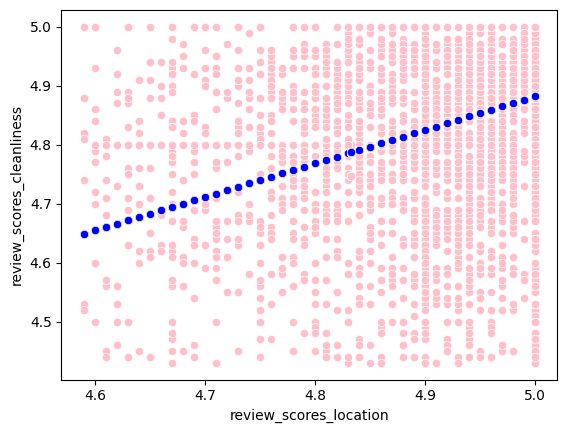

In [51]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="pink", data=private_room)
sns.scatterplot(x='review_scores_location', y='Predicciones4', color="blue", data=private_room)

In [52]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.15013217351593855
Coeficiente de correlación:  0.38746893232353297


## **5. availability_365 vs number_of_reviews**

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

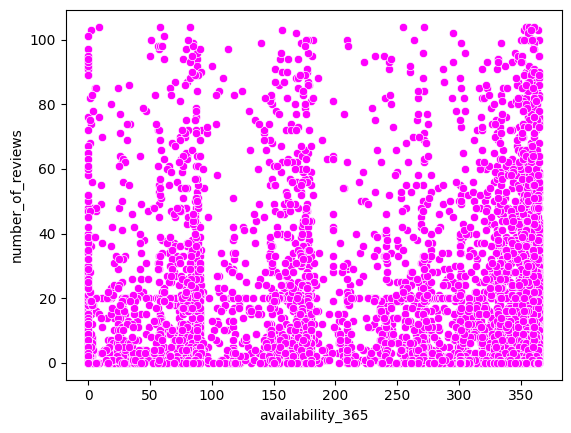

In [53]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='number_of_reviews',color="magenta",data=private_room)

In [54]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['availability_365']]
Var_Dep= private_room['number_of_reviews']

In [55]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [56]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [57]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [58]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.0122029]),
 'rank_': 1,
 'singular_': array([11333.32566802]),
 'intercept_': 18.128555018548873}

**Modelo matematico : y=-0.0122029x + 18.128555018548873**

In [59]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.005204482785594267

In [60]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['availability_365']])
y_pred

array([16.07846811, 13.69890294, 14.66293191, ..., 13.91855511,
       13.68670004, 15.93203333])

In [61]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones5', y_pred)
private_room.head()

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,16.078468,4.847864,16.616982,1255.051709,98.362199,7.0,https://www.airbnb.com/rooms/61792,30/03/23,city scrape,Spacious Clean Quiet room (own bath) in Condesa,...,4.900000,4.920000,4.950000,4.940000,4.870000,2.0,0.0,2.0,0.0,0.94
16,13.698903,4.768278,15.334074,1461.009716,98.140350,16.0,https://www.airbnb.com/rooms/760912,30/03/23,city scrape,"Stylish bachelor pad in La Roma, DF",...,4.800000,5.000000,4.600000,4.800000,4.600000,1.0,0.0,1.0,0.0,0.04
17,14.662932,4.825125,12.557409,1906.775590,97.660190,17.0,https://www.airbnb.com/rooms/2088218,30/03/23,city scrape,Private rooms near old Coyoacan center,...,4.600000,5.000000,4.800000,4.900000,4.400000,1.0,0.0,1.0,0.0,0.04
18,13.674497,4.786825,15.334074,1461.009716,98.140350,18.0,https://www.airbnb.com/rooms/2093036,29/03/23,city scrape,Departamento 2 dormitorios x Antara,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,0.0,1.0,0.0,1.14
21,17.054700,4.786825,12.557409,1906.775590,97.660190,21.0,https://www.airbnb.com/rooms/131610,29/03/23,city scrape,MARIA DEL ALMA,...,4.746342,4.827133,4.815533,4.832627,4.708674,3.0,1.0,2.0,0.0,1.14


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

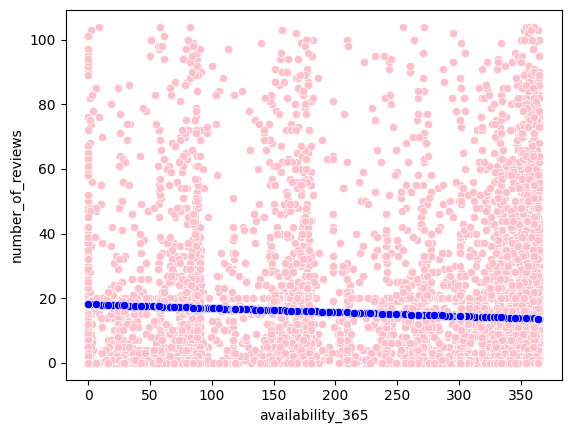

In [62]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='number_of_reviews', color="pink", data=private_room)
sns.scatterplot(x='availability_365', y='Predicciones5', color="blue", data=private_room)

In [63]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.005204482785594267
Coeficiente de correlación:  0.0721421013389149


## **6. reviews_per_month vs review_scores_communication**

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

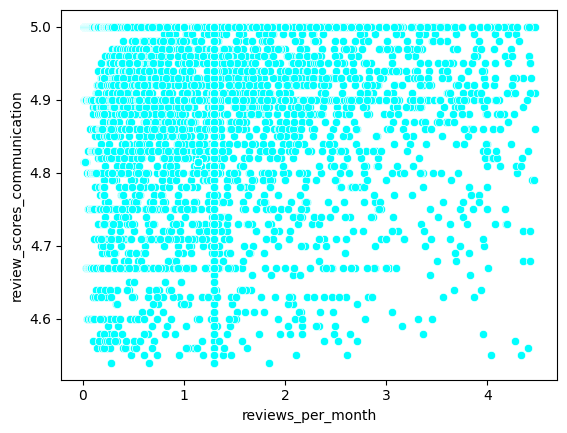

In [64]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='reviews_per_month', y='review_scores_communication',color="cyan",data=private_room)

In [65]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['reviews_per_month']]
Var_Dep= private_room['review_scores_communication']

In [66]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [67]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [68]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [69]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.02418424]),
 'rank_': 1,
 'singular_': array([79.04040469]),
 'intercept_': 4.9167007417122255}

**Modelo matematico: y = -0.02418424x + 4.9167007417122255**

In [70]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.04189732352718334

In [71]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['reviews_per_month']])
y_pred

array([4.89396756, 4.91573337, 4.91573337, ..., 4.88913071, 4.88913071,
       4.88913071])

In [72]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones6', y_pred)
private_room.head()

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,4.893968,16.078468,4.847864,16.616982,1255.051709,98.362199,7.0,https://www.airbnb.com/rooms/61792,30/03/23,city scrape,...,4.900000,4.920000,4.950000,4.940000,4.870000,2.0,0.0,2.0,0.0,0.94
16,4.915733,13.698903,4.768278,15.334074,1461.009716,98.140350,16.0,https://www.airbnb.com/rooms/760912,30/03/23,city scrape,...,4.800000,5.000000,4.600000,4.800000,4.600000,1.0,0.0,1.0,0.0,0.04
17,4.915733,14.662932,4.825125,12.557409,1906.775590,97.660190,17.0,https://www.airbnb.com/rooms/2088218,30/03/23,city scrape,...,4.600000,5.000000,4.800000,4.900000,4.400000,1.0,0.0,1.0,0.0,0.04
18,4.889131,13.674497,4.786825,15.334074,1461.009716,98.140350,18.0,https://www.airbnb.com/rooms/2093036,29/03/23,city scrape,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,0.0,1.0,0.0,1.14
21,4.889131,17.054700,4.786825,12.557409,1906.775590,97.660190,21.0,https://www.airbnb.com/rooms/131610,29/03/23,city scrape,...,4.746342,4.827133,4.815533,4.832627,4.708674,3.0,1.0,2.0,0.0,1.14


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

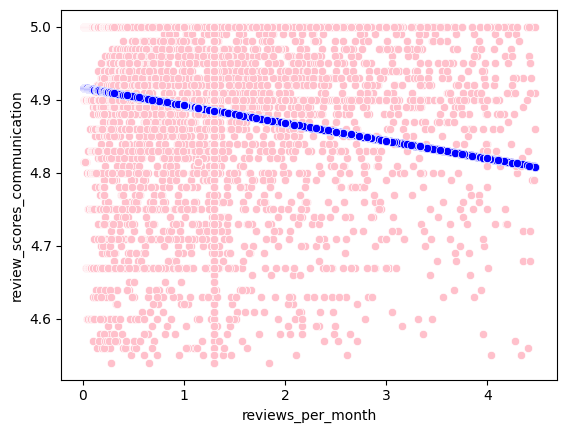

In [73]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="pink", data=private_room)
sns.scatterplot(x='reviews_per_month', y='Predicciones6', color="blue", data=private_room)

In [74]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.04189732352718334
Coeficiente de correlación:  0.20468835708750838


In [75]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(private_room)

In [76]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=private_room.corr()
Corr_Factors

<ipython-input-76-5346aab0bab6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=private_room.corr()


,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,bathrooms_text,price,id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones6,1.000000,0.049110,0.142584,-0.152337,0.152337,-0.152337,-0.249382,0.036705,0.011621,-0.215763,...,0.155626,0.220259,0.204688,0.142584,0.167902,-0.103726,-0.107117,0.021377,NaN,-1.000000
Predicciones5,0.049110,1.000000,0.070653,-0.057426,0.057426,-0.057426,-0.169162,-0.050504,0.006667,-0.163500,...,0.056784,0.081312,0.074652,0.070653,0.094278,-0.093235,-0.035837,-0.044615,NaN,-0.049110
Predicciones4,0.142584,0.070653,1.000000,0.013977,-0.013977,0.013977,-0.038399,-0.021791,-0.003187,-0.018274,...,0.387469,0.485446,0.464660,1.000000,0.467865,-0.017721,-0.023967,0.019865,NaN,-0.142584
Predicciones3,-0.152337,-0.057426,0.013977,1.000000,-1.000000,1.000000,0.107433,0.014412,-0.014469,0.085459,...,-0.017764,-0.026779,-0.015145,0.013977,-0.035987,0.138212,0.083503,0.039708,NaN,0.152337
Predicciones2,0.152337,0.057426,-0.013977,-1.000000,1.000000,-1.000000,-0.107433,-0.014412,0.014469,-0.085459,...,0.017764,0.026779,0.015145,-0.013977,0.035987,-0.138212,-0.083503,-0.039708,NaN,-0.152337
Predicciones,-0.152337,-0.057426,0.013977,1.000000,-1.000000,1.000000,0.107433,0.014412,-0.014469,0.085459,...,-0.017764,-0.026779,-0.015145,0.013977,-0.035987,0.138212,0.083503,0.039708,NaN,0.152337
Unnamed: 0,-0.249382,-0.169162,-0.038399,0.107433,-0.107433,0.107433,1.000000,-0.007882,0.002243,0.862675,...,-0.001462,-0.054753,-0.032425,-0.038399,-0.033586,0.113181,0.115129,-0.010359,NaN,0.249382
bathrooms_text,0.036705,-0.050504,-0.021791,0.014412,-0.014412,0.014412,-0.007882,1.000000,0.008461,-0.009097,...,-0.026222,-0.007615,-0.004227,-0.021791,-0.024283,0.109449,0.024390,-0.013620,NaN,-0.036705
price,0.011621,0.006667,-0.003187,-0.014469,0.014469,-0.014469,0.002243,0.008461,1.000000,0.001731,...,0.004530,0.003629,0.004075,-0.003187,0.003522,-0.009916,-0.004844,-0.014901,NaN,-0.011621
id,-0.215763,-0.163500,-0.018274,0.085459,-0.085459,0.085459,0.862675,-0.009097,0.001731,1.000000,...,0.021694,-0.015445,0.016055,-0.018274,0.005732,0.059150,0.100609,-0.009768,NaN,0.215763


In [77]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,bathrooms_text,price,id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones6,1.000000,0.049110,0.142584,0.152337,0.152337,0.152337,0.249382,0.036705,0.011621,0.215763,...,0.155626,0.220259,0.204688,0.142584,0.167902,0.103726,0.107117,0.021377,NaN,1.000000
Predicciones5,0.049110,1.000000,0.070653,0.057426,0.057426,0.057426,0.169162,0.050504,0.006667,0.163500,...,0.056784,0.081312,0.074652,0.070653,0.094278,0.093235,0.035837,0.044615,NaN,0.049110
Predicciones4,0.142584,0.070653,1.000000,0.013977,0.013977,0.013977,0.038399,0.021791,0.003187,0.018274,...,0.387469,0.485446,0.464660,1.000000,0.467865,0.017721,0.023967,0.019865,NaN,0.142584
Predicciones3,0.152337,0.057426,0.013977,1.000000,1.000000,1.000000,0.107433,0.014412,0.014469,0.085459,...,0.017764,0.026779,0.015145,0.013977,0.035987,0.138212,0.083503,0.039708,NaN,0.152337
Predicciones2,0.152337,0.057426,0.013977,1.000000,1.000000,1.000000,0.107433,0.014412,0.014469,0.085459,...,0.017764,0.026779,0.015145,0.013977,0.035987,0.138212,0.083503,0.039708,NaN,0.152337
Predicciones,0.152337,0.057426,0.013977,1.000000,1.000000,1.000000,0.107433,0.014412,0.014469,0.085459,...,0.017764,0.026779,0.015145,0.013977,0.035987,0.138212,0.083503,0.039708,NaN,0.152337
Unnamed: 0,0.249382,0.169162,0.038399,0.107433,0.107433,0.107433,1.000000,0.007882,0.002243,0.862675,...,0.001462,0.054753,0.032425,0.038399,0.033586,0.113181,0.115129,0.010359,NaN,0.249382
bathrooms_text,0.036705,0.050504,0.021791,0.014412,0.014412,0.014412,0.007882,1.000000,0.008461,0.009097,...,0.026222,0.007615,0.004227,0.021791,0.024283,0.109449,0.024390,0.013620,NaN,0.036705
price,0.011621,0.006667,0.003187,0.014469,0.014469,0.014469,0.002243,0.008461,1.000000,0.001731,...,0.004530,0.003629,0.004075,0.003187,0.003522,0.009916,0.004844,0.014901,NaN,0.011621
id,0.215763,0.163500,0.018274,0.085459,0.085459,0.085459,0.862675,0.009097,0.001731,1.000000,...,0.021694,0.015445,0.016055,0.018274,0.005732,0.059150,0.100609,0.009768,NaN,0.215763


<Axes: >

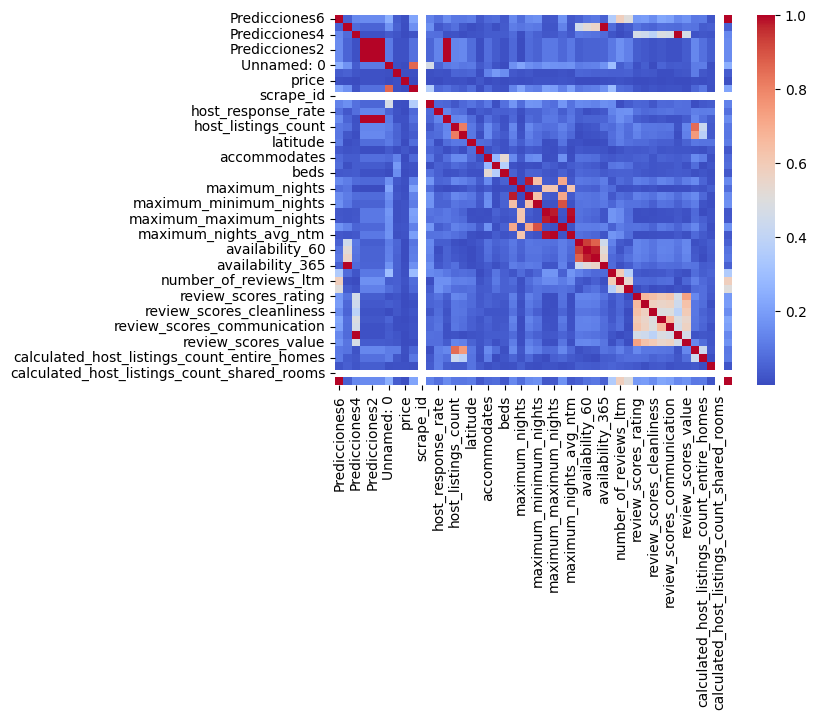

In [78]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')  
Heat_Map

<Axes: >

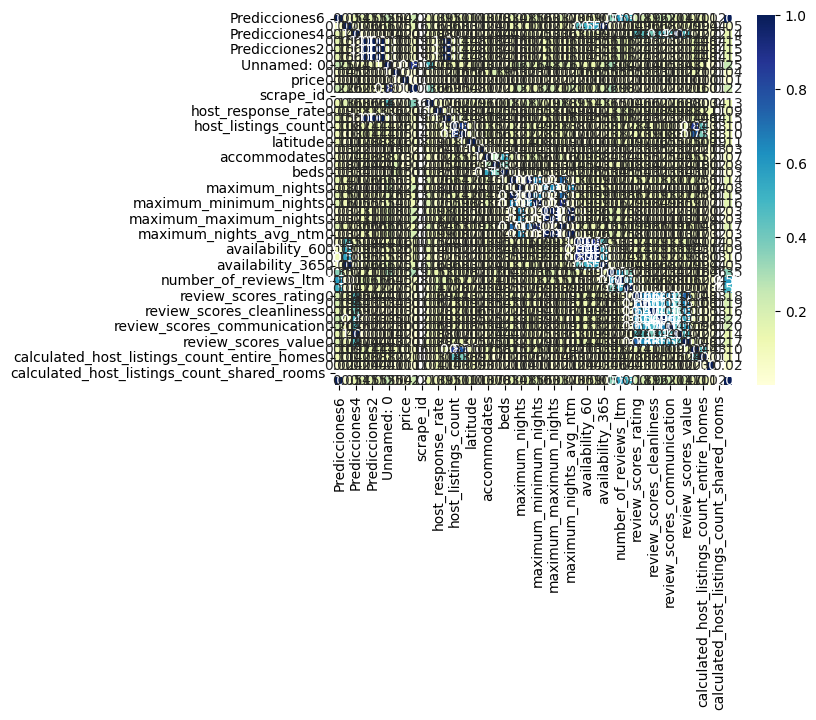

In [79]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

# **Tipo de habitación 2: Entire home/apt.**

In [80]:
df= pd.read_csv("Datos_limpios_MEX.csv")
df.head()

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,sin informacion,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,...,4.950000,5.000000,4.950000,5.000000,4.860000,3.0,3.0,0.0,0.0,0.19
1,1.0,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,...,4.880000,4.930000,5.000000,4.950000,4.840000,2.0,2.0,0.0,0.0,0.54
2,2.0,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,...,4.710000,4.920000,4.920000,4.900000,4.710000,3.0,3.0,0.0,0.0,0.31
3,3.0,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,1.0,0.0,0.0,1.14
4,4.0,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,sin informacion,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,...,4.700000,4.870000,4.780000,4.980000,4.480000,12.0,3.0,2.0,0.0,0.46


In [81]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

72

In [82]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [83]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

# **1.host_acceptance_rate vs host_response_rate**

In [84]:
enthome_apt = df[df['room_type'] == 'Entire home/apt']

In [ ]:
#Cambiar datos
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].astype(str)  
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].str.replace('%', '')  
enthome_apt['host_response_rate'] = pd.to_numeric(enthome_apt['host_response_rate'], errors='coerce') 

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

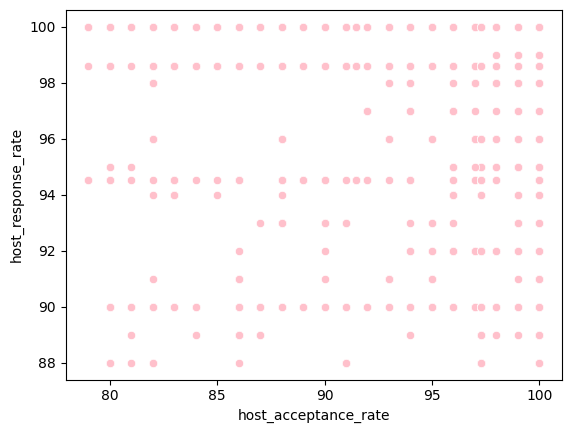

In [86]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=enthome_apt)

In [87]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['host_acceptance_rate']]
Var_Dep= enthome_apt['host_response_rate']

In [88]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [89]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [90]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [91]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.14313177]),
 'rank_': 1,
 'singular_': array([508.88571169]),
 'intercept_': 84.90857367504947}

Modelo matemático: y= 0.14313177x + 84.90857367504947

In [92]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.06146279749703276

In [93]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['host_acceptance_rate']])
y_pred

array([97.99886841, 97.99886841, 97.79043329, ..., 97.99886841,
       99.22175102, 99.22175102])

In [94]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones', y_pred)
enthome_apt.head()

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97.998868,0.0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,sin informacion,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,...,4.950000,5.000000,4.950000,5.000000,4.860000,3.0,3.0,0.0,0.0,0.19
1,97.998868,1.0,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,...,4.880000,4.930000,5.000000,4.950000,4.840000,2.0,2.0,0.0,0.0,0.54
2,97.790433,2.0,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,...,4.710000,4.920000,4.920000,4.900000,4.710000,3.0,3.0,0.0,0.0,0.31
3,97.998868,3.0,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,1.0,0.0,0.0,1.14
4,97.217906,4.0,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,sin informacion,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,...,4.700000,4.870000,4.780000,4.980000,4.480000,12.0,3.0,2.0,0.0,0.46


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

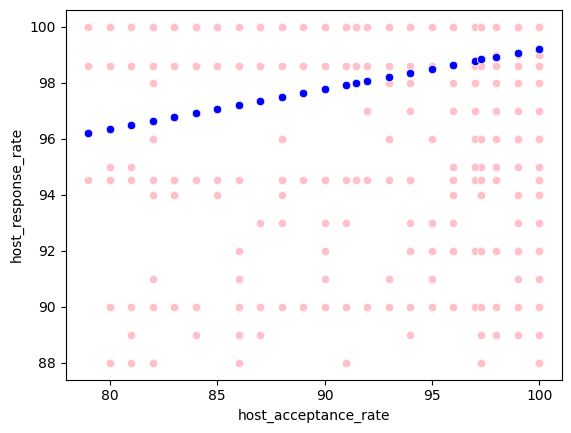

In [95]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="blue", data=enthome_apt)

In [96]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.06146279749703276
Coeficiente de correlación:  0.2479169165205004


#**2. host_acceptance_rate vs price**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

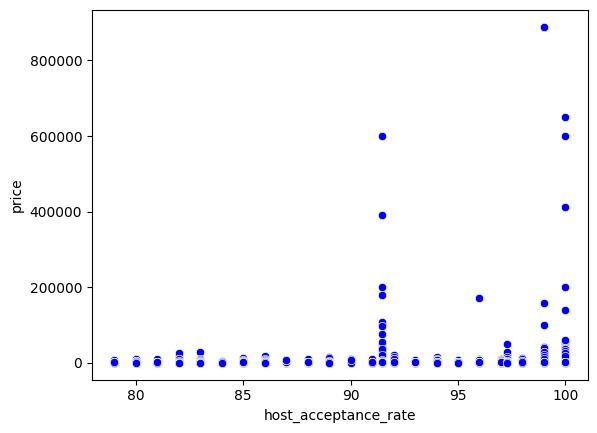

In [97]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price',color="blue",data=enthome_apt)

In [98]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['host_acceptance_rate']]
Var_Dep= enthome_apt['price']

In [99]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [100]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [101]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [102]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-26.33586907]),
 'rank_': 1,
 'singular_': array([508.88571169]),
 'intercept_': 4693.748205438369}

**Modelo matemático: y= -26.33586907x + 4693.748205438369**

In [103]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

5.372389761981733e-05

In [104]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['host_acceptance_rate']])
y_pred

array([2285.16847635, 2285.16847635, 2323.51998921, ..., 2285.16847635,
       2060.16129852, 2060.16129852])

In [105]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones2', y_pred)
enthome_apt.head()

,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2285.168476,97.998868,0.0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,sin informacion,https://a0.muscache.com/pictures/28353712/4379...,...,4.950000,5.000000,4.950000,5.000000,4.860000,3.0,3.0,0.0,0.0,0.19
1,2285.168476,97.998868,1.0,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,...,4.880000,4.930000,5.000000,4.950000,4.840000,2.0,2.0,0.0,0.0,0.54
2,2323.519989,97.790433,2.0,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,...,4.710000,4.920000,4.920000,4.900000,4.710000,3.0,3.0,0.0,0.0,0.31
3,2285.168476,97.998868,3.0,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,1.0,0.0,0.0,1.14
4,2428.863465,97.217906,4.0,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,sin informacion,https://a0.muscache.com/pictures/251410/ec75fe...,...,4.700000,4.870000,4.780000,4.980000,4.480000,12.0,3.0,2.0,0.0,0.46


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

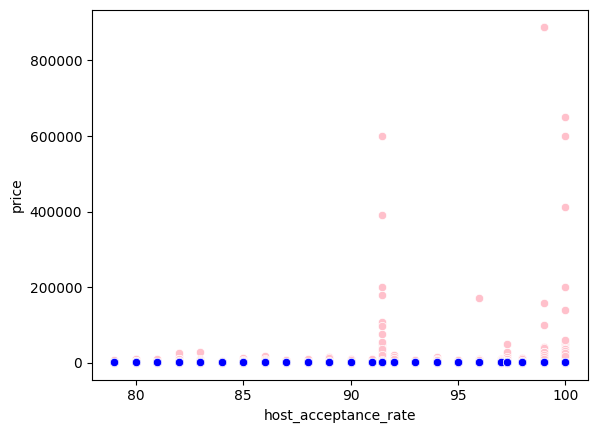

In [106]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones2', color="blue", data=enthome_apt)

In [107]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  5.372389761981733e-05
Coeficiente de correlación:  0.007329658765578199


# **3. host_acceptance_rate vs number_of_reviews**

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

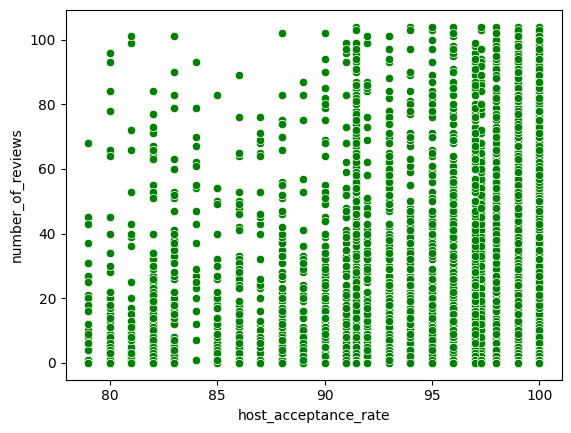

In [108]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews',color="green",data=enthome_apt)

In [109]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['host_acceptance_rate']]
Var_Dep= enthome_apt['number_of_reviews']

In [110]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [111]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [112]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [113]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.60611942]),
 'rank_': 1,
 'singular_': array([508.88571169]),
 'intercept_': -35.99895227530851}

**Modelo matemático: y= 0.60611942x + -35.99895227530851**

In [114]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.010272646076547653

In [115]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['host_acceptance_rate']])
y_pred

array([19.43445507, 19.43445507, 18.55179588, ..., 19.43445507,
       24.61299012, 24.61299012])

In [116]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones3', y_pred)
enthome_apt.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,19.434455,2285.168476,97.998868,0.0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,sin informacion,...,4.950000,5.000000,4.950000,5.000000,4.860000,3.0,3.0,0.0,0.0,0.19
1,19.434455,2285.168476,97.998868,1.0,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",...,4.880000,4.930000,5.000000,4.950000,4.840000,2.0,2.0,0.0,0.0,0.54
2,18.551796,2323.519989,97.790433,2.0,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",...,4.710000,4.920000,4.920000,4.900000,4.710000,3.0,3.0,0.0,0.0,0.31
3,19.434455,2285.168476,97.998868,3.0,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,1.0,0.0,0.0,1.14
4,16.127318,2428.863465,97.217906,4.0,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,sin informacion,...,4.700000,4.870000,4.780000,4.980000,4.480000,12.0,3.0,2.0,0.0,0.46


<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

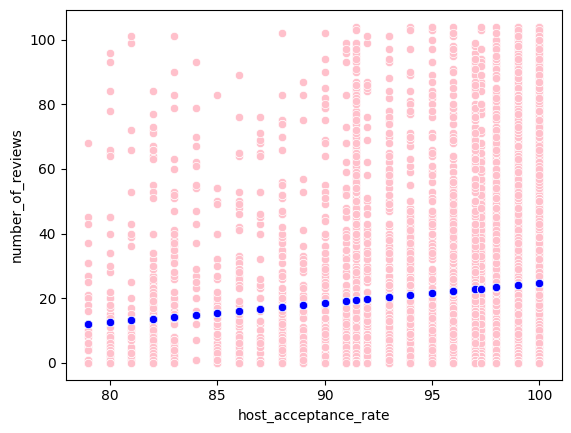

In [117]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="pink", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="blue", data=enthome_apt)

In [118]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.010272646076547653
Coeficiente de correlación:  0.10135406295037044


## **4. review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

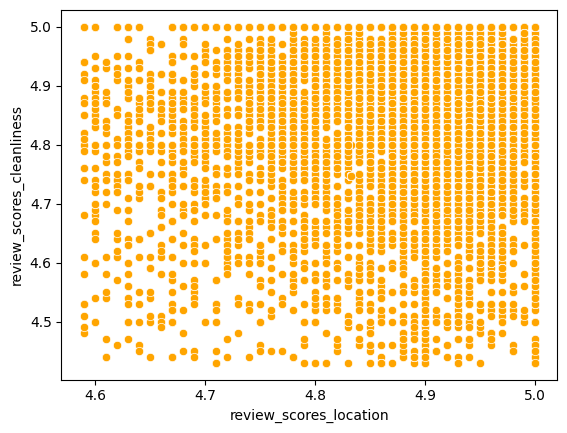

In [119]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness',color="orange", data=enthome_apt)

In [120]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['review_scores_location']]
Var_Dep= enthome_apt['review_scores_cleanliness']

In [121]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [122]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [123]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [124]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.38973365]),
 'rank_': 1,
 'singular_': array([11.91097941]),
 'intercept_': 2.927803508975833}

**Modelo matemático: y= 0.38973365x + 2.927803508975833**

In [125]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.07612613376188848

In [126]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['review_scores_location']])
y_pred

array([4.87647177, 4.85698508, 4.8374984 , ..., 4.81124069, 4.81124069,
       4.81124069])

In [127]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones4', y_pred)
enthome_apt.head()

,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4.876472,19.434455,2285.168476,97.998868,0.0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,...,4.950000,5.000000,4.950000,5.000000,4.860000,3.0,3.0,0.0,0.0,0.19
1,4.856985,19.434455,2285.168476,97.998868,1.0,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,...,4.880000,4.930000,5.000000,4.950000,4.840000,2.0,2.0,0.0,0.0,0.54
2,4.837498,18.551796,2323.519989,97.790433,2.0,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...",...,4.710000,4.920000,4.920000,4.900000,4.710000,3.0,3.0,0.0,0.0,0.31
3,4.811241,19.434455,2285.168476,97.998868,3.0,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,1.0,0.0,0.0,1.14
4,4.868677,16.127318,2428.863465,97.217906,4.0,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,...,4.700000,4.870000,4.780000,4.980000,4.480000,12.0,3.0,2.0,0.0,0.46


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

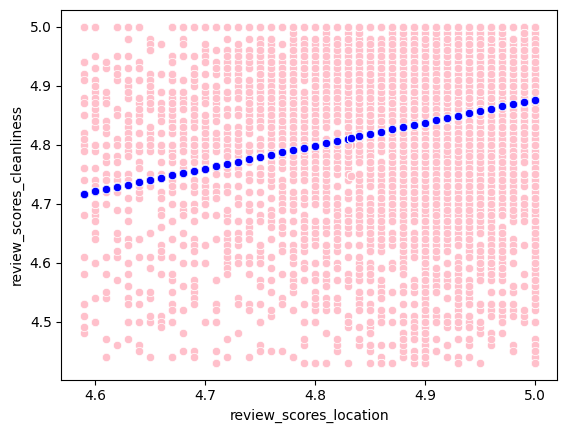

In [128]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="pink", data=enthome_apt)
sns.scatterplot(x='review_scores_location', y='Predicciones4', color="blue", data=enthome_apt)

In [129]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.07612613376188848
Coeficiente de correlación:  0.2759096478231388


## **5. availability_365 vs number_of_reviews**

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

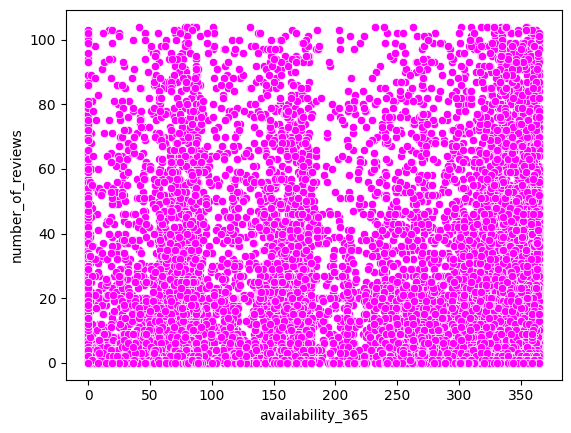

In [130]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='number_of_reviews',color="magenta",data=enthome_apt)

In [131]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['availability_365']]
Var_Dep= enthome_apt['number_of_reviews']

In [132]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [133]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [134]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [135]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.01241506]),
 'rank_': 1,
 'singular_': array([15386.12364544]),
 'intercept_': 26.1317330762416}

**Modelo matematico : y=-0.01241506x + 26.1317330762416**

In [136]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.003939867761715177

In [137]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['availability_365']])
y_pred

array([22.10925292, 21.83612155, 25.05162266, ..., 21.60023536,
       21.86095167, 21.67472574])

In [138]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones5', y_pred)
enthome_apt.head()

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,22.109253,4.876472,19.434455,2285.168476,97.998868,0.0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,...,4.950000,5.000000,4.950000,5.000000,4.860000,3.0,3.0,0.0,0.0,0.19
1,21.836122,4.856985,19.434455,2285.168476,97.998868,1.0,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,...,4.880000,4.930000,5.000000,4.950000,4.840000,2.0,2.0,0.0,0.0,0.54
2,25.051623,4.837498,18.551796,2323.519989,97.790433,2.0,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...",...,4.710000,4.920000,4.920000,4.900000,4.710000,3.0,3.0,0.0,0.0,0.31
3,21.625065,4.811241,19.434455,2285.168476,97.998868,3.0,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,Villa Dante,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,1.0,0.0,0.0,1.14
4,21.699556,4.868677,16.127318,2428.863465,97.217906,4.0,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,CONDESA HAUS B&B,...,4.700000,4.870000,4.780000,4.980000,4.480000,12.0,3.0,2.0,0.0,0.46


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

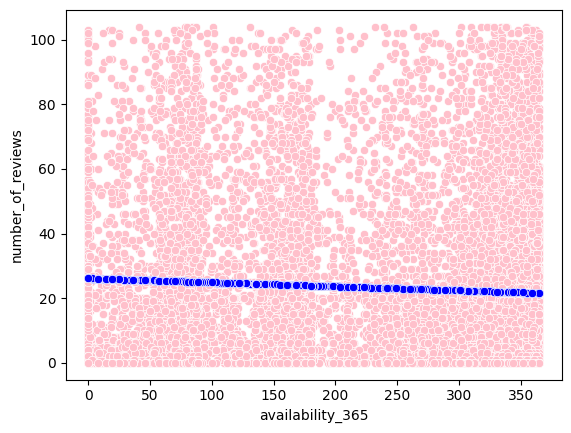

In [139]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='number_of_reviews', color="pink", data=enthome_apt)
sns.scatterplot(x='availability_365', y='Predicciones5', color="blue", data=enthome_apt)

In [140]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.003939867761715177
Coeficiente de correlación:  0.06276836593153574


## **6. reviews_per_month vs review_scores_communication**

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

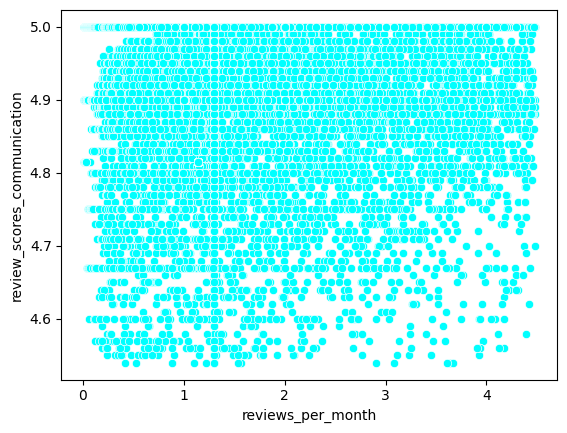

In [141]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='reviews_per_month', y='review_scores_communication',color="cyan",data=enthome_apt)

In [142]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['reviews_per_month']]
Var_Dep= enthome_apt['review_scores_communication']

In [143]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [144]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [145]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [146]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00688106]),
 'rank_': 1,
 'singular_': array([131.97499464]),
 'intercept_': 4.908348558726651}

**Modelo matematico: y = -0.00688106x + 4.908348558726651**

In [147]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.00516093711377319

In [148]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['reviews_per_month']])
y_pred

array([4.90704116, 4.90463278, 4.90621543, ..., 4.90050415, 4.90050415,
       4.90050415])

In [150]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones6', y_pred)
enthome_apt.head()

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4.907041,22.109253,4.876472,19.434455,2285.168476,97.998868,0.0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,...,4.950000,5.000000,4.950000,5.000000,4.860000,3.0,3.0,0.0,0.0,0.19
1,4.904633,21.836122,4.856985,19.434455,2285.168476,97.998868,1.0,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,...,4.880000,4.930000,5.000000,4.950000,4.840000,2.0,2.0,0.0,0.0,0.54
2,4.906215,25.051623,4.837498,18.551796,2323.519989,97.790433,2.0,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,...,4.710000,4.920000,4.920000,4.900000,4.710000,3.0,3.0,0.0,0.0,0.31
3,4.900504,21.625065,4.811241,19.434455,2285.168476,97.998868,3.0,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,...,4.746342,4.827133,4.815533,4.832627,4.708674,1.0,1.0,0.0,0.0,1.14
4,4.905183,21.699556,4.868677,16.127318,2428.863465,97.217906,4.0,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,...,4.700000,4.870000,4.780000,4.980000,4.480000,12.0,3.0,2.0,0.0,0.46


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

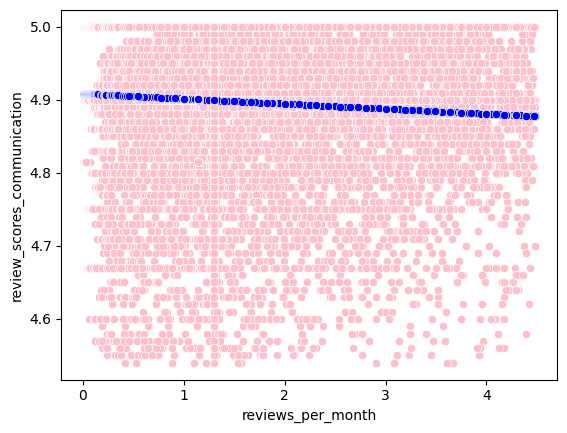

In [151]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="pink", data=enthome_apt)
sns.scatterplot(x='reviews_per_month', y='Predicciones6', color="blue", data=enthome_apt)

In [152]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.00516093711377319
Coeficiente de correlación:  0.0718396625393883


In [153]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(enthome_apt)

In [154]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors1_1=enthome_apt.corr()
Corr_Factors1_1

<ipython-input-154-6cdc44a55d36>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors1_1=enthome_apt.corr()


,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,bathrooms_text,price,id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones6,1.000000,0.068208,0.051231,-0.225550,0.225550,-0.225550,-0.145049,0.023661,0.017226,-0.127950,...,0.013131,0.093972,0.071840,0.051231,0.031209,-0.080739,-0.086688,0.017011,NaN,-1.000000
Predicciones5,0.068208,1.000000,0.039757,-0.078214,0.078214,-0.078214,-0.171890,-0.000859,-0.004017,-0.169555,...,0.038025,0.072742,0.083742,0.039757,0.078085,-0.086213,-0.069548,-0.046615,NaN,-0.068208
Predicciones4,0.051231,0.039757,1.000000,0.000680,-0.000680,0.000680,0.011820,0.071857,0.003114,0.025846,...,0.275910,0.332836,0.321689,1.000000,0.344815,-0.011537,-0.013598,-0.007330,NaN,-0.051231
Predicciones3,-0.225550,-0.078214,0.000680,1.000000,-1.000000,1.000000,0.105558,-0.032305,-0.007330,0.073625,...,0.022143,-0.010639,0.000507,0.000680,-0.009794,0.135659,0.103939,0.047690,NaN,0.225550
Predicciones2,0.225550,0.078214,-0.000680,-1.000000,1.000000,-1.000000,-0.105558,0.032305,0.007330,-0.073625,...,-0.022143,0.010639,-0.000507,-0.000680,0.009794,-0.135659,-0.103939,-0.047690,NaN,-0.225550
Predicciones,-0.225550,-0.078214,0.000680,1.000000,-1.000000,1.000000,0.105558,-0.032305,-0.007330,0.073625,...,0.022143,-0.010639,0.000507,0.000680,-0.009794,0.135659,0.103939,0.047690,NaN,0.225550
Unnamed: 0,-0.145049,-0.171890,0.011820,0.105558,-0.105558,0.105558,1.000000,0.041606,-0.006876,0.862361,...,0.050913,-0.008768,0.009716,0.011820,0.035359,0.078575,0.030061,0.036483,NaN,0.145049
bathrooms_text,0.023661,-0.000859,0.071857,-0.032305,0.032305,-0.032305,0.041606,1.000000,0.074154,0.048841,...,0.040243,0.025854,0.035290,0.071857,0.063696,0.008996,-0.051625,0.023136,NaN,-0.023661
price,0.017226,-0.004017,0.003114,-0.007330,0.007330,-0.007330,-0.006876,0.074154,1.000000,-0.004479,...,-0.001011,0.000909,-0.004510,0.003114,0.005398,0.007593,0.012940,-0.007183,NaN,-0.017226
id,-0.127950,-0.169555,0.025846,0.073625,-0.073625,0.073625,0.862361,0.048841,-0.004479,1.000000,...,0.064802,0.021335,0.036277,0.025846,0.061044,0.058694,0.019092,0.045844,NaN,0.127950


In [155]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors11= abs(Corr_Factors1_1)
Corr_Factors11

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,bathrooms_text,price,id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones6,1.000000,0.068208,0.051231,0.225550,0.225550,0.225550,0.145049,0.023661,0.017226,0.127950,...,0.013131,0.093972,0.071840,0.051231,0.031209,0.080739,0.086688,0.017011,NaN,1.000000
Predicciones5,0.068208,1.000000,0.039757,0.078214,0.078214,0.078214,0.171890,0.000859,0.004017,0.169555,...,0.038025,0.072742,0.083742,0.039757,0.078085,0.086213,0.069548,0.046615,NaN,0.068208
Predicciones4,0.051231,0.039757,1.000000,0.000680,0.000680,0.000680,0.011820,0.071857,0.003114,0.025846,...,0.275910,0.332836,0.321689,1.000000,0.344815,0.011537,0.013598,0.007330,NaN,0.051231
Predicciones3,0.225550,0.078214,0.000680,1.000000,1.000000,1.000000,0.105558,0.032305,0.007330,0.073625,...,0.022143,0.010639,0.000507,0.000680,0.009794,0.135659,0.103939,0.047690,NaN,0.225550
Predicciones2,0.225550,0.078214,0.000680,1.000000,1.000000,1.000000,0.105558,0.032305,0.007330,0.073625,...,0.022143,0.010639,0.000507,0.000680,0.009794,0.135659,0.103939,0.047690,NaN,0.225550
Predicciones,0.225550,0.078214,0.000680,1.000000,1.000000,1.000000,0.105558,0.032305,0.007330,0.073625,...,0.022143,0.010639,0.000507,0.000680,0.009794,0.135659,0.103939,0.047690,NaN,0.225550
Unnamed: 0,0.145049,0.171890,0.011820,0.105558,0.105558,0.105558,1.000000,0.041606,0.006876,0.862361,...,0.050913,0.008768,0.009716,0.011820,0.035359,0.078575,0.030061,0.036483,NaN,0.145049
bathrooms_text,0.023661,0.000859,0.071857,0.032305,0.032305,0.032305,0.041606,1.000000,0.074154,0.048841,...,0.040243,0.025854,0.035290,0.071857,0.063696,0.008996,0.051625,0.023136,NaN,0.023661
price,0.017226,0.004017,0.003114,0.007330,0.007330,0.007330,0.006876,0.074154,1.000000,0.004479,...,0.001011,0.000909,0.004510,0.003114,0.005398,0.007593,0.012940,0.007183,NaN,0.017226
id,0.127950,0.169555,0.025846,0.073625,0.073625,0.073625,0.862361,0.048841,0.004479,1.000000,...,0.064802,0.021335,0.036277,0.025846,0.061044,0.058694,0.019092,0.045844,NaN,0.127950


<Axes: >

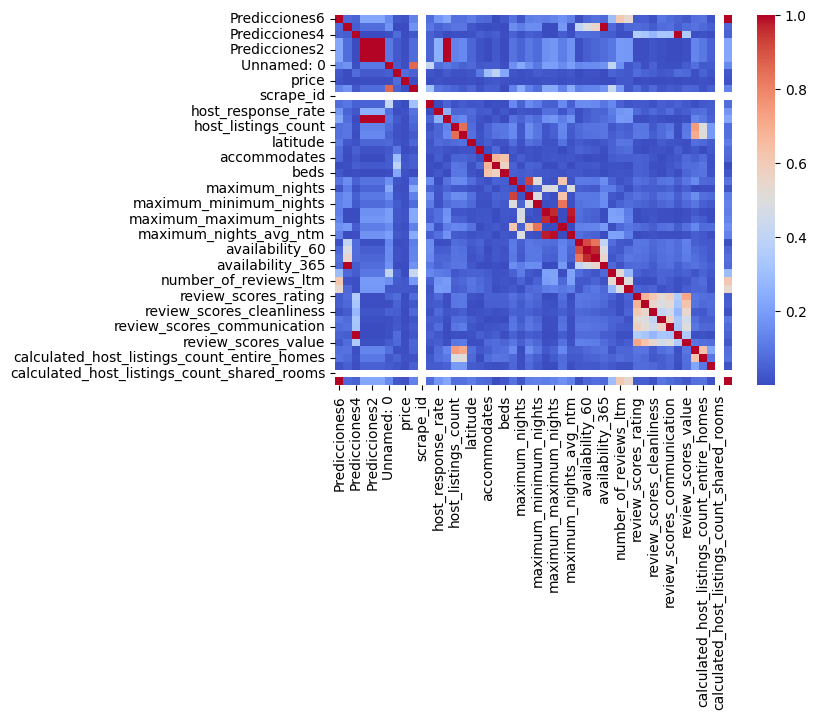

In [156]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map1= sns.heatmap(Corr_Factors11, cmap = 'coolwarm')  
Heat_Map1

<Axes: >

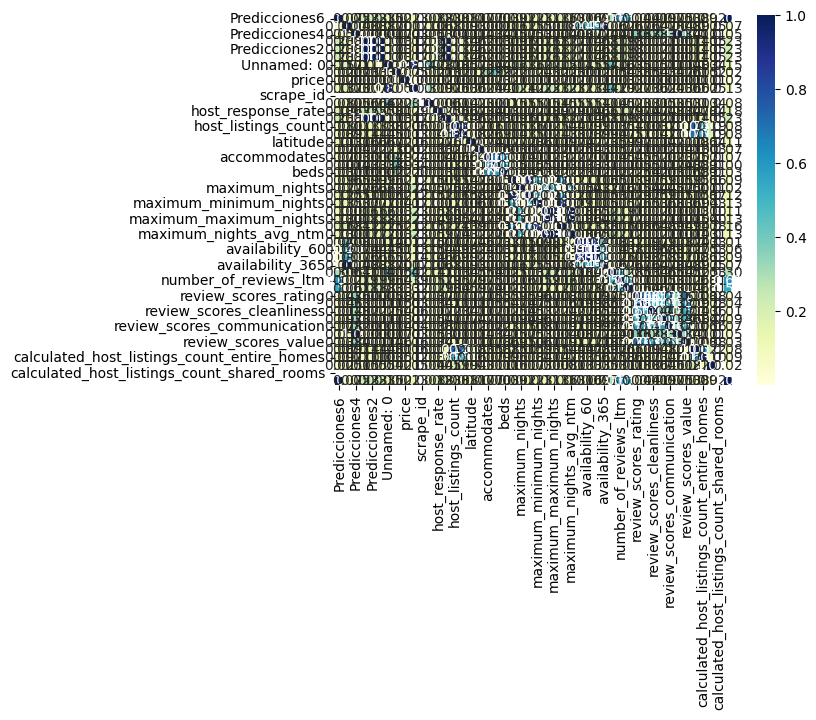

In [158]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map2= sns.heatmap(Corr_Factors11, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map2